In [1]:
cd /data/a/cpac/isultan/projects/halomassloss/core_catalog_mevolved

/data/a/cpac/isultan/projects/halomassloss/core_catalog_mevolved


In [2]:
from itk import hist, h5_read_dict, h5_read_files, gio_read_dict, loadpickle, plt_latex, periodic_bcs, many_to_one, reldif, nratioerr, real_fof_tags, SIMPARAMS, duplicate_rows, inrange, combine_dicts, grep_dict, replace_elems, binaryarray_outline, sod_spatial_match, dict_deepcopy
import numpy as np
import matplotlib.pyplot as plt
import genericio as gio

In [3]:
COLOR_SCHEME = ['#2402ba','#b400e0','#98c1d9','#ff0000','#292800','#ff9b71']

In [4]:
AFID, ZETAFID = 1.1, 0.1
A_arr = np.array([0.4, 0.5, 0.6 , 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4])
zeta_arr = np.array([0.001, 0.005, 0.01, 0.02, 0.04, 0.07, 0.08, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3])
DELTACHIDOF2MAX = 1

In [5]:
PARTICLEMASS = {k:v['PARTICLEMASS'] for k,v in SIMPARAMS.items()}
OBJECTMASSCUT = {'HM':SIMPARAMS['HM']['PARTICLEMASS']*100, 'SV':SIMPARAMS['SV']['PARTICLEMASS']*100, 'AQ':SIMPARAMS['AQ']['PARTICLEMASS']*100, 'LJ':SIMPARAMS['LJ']['PARTICLEMASS']*100, 'AlphaQ':SIMPARAMS['AQ']['PARTICLEMASS']*100}
SUBHALOMINMASS = { 'HM':20.*SIMPARAMS['HM']['PARTICLEMASS'], 'SV':20.*SIMPARAMS['SV']['PARTICLEMASS'], 'AQ':20.*SIMPARAMS['AQ']['PARTICLEMASS'], 'AlphaQ':20.*SIMPARAMS['AQ']['PARTICLEMASS'] }
SUBHALOMINCOUNT = { 'HM':20, 'SV':20 }

In [6]:
SHMLM_SV=None
exec(open('paper2plotscripts.py').read())
CC_HOST_VARS = [ ('M', 'infall_fof_halo_mass'), ('CORETAG', 'core_tag') ]

In [7]:
def load_data(step):
    sh_vars = ['fof_halo_tag','subhalo_mean_x','subhalo_mean_y','subhalo_mean_z','subhalo_mean_vx', 'subhalo_mean_vy', 'subhalo_mean_vz', 'subhalo_count', 'subhalo_tag', 'subhalo_mass', 'fof_halo_count']
    hp_vars = ['fof_halo_tag', 'fof_halo_mass', 'fof_halo_center_x', 'fof_halo_center_y', 'fof_halo_center_z']

    cc_HM = h5_read_dict(f'/home/isultan/scratch/sptest/outputHM/{step}.corepropertiesextend.hdf5')
    sh_HM = h5_read_dict(f'/home/isultan/data/SHfindertests/HM_final/subhalos_HM_{step}.hdf5', 'subhalos')

    cc_SV = h5_read_dict(f'/home/isultan/scratch/sptest/outputSV/{step}.corepropertiesextend.hdf5')
    sh_SV = gio_read_dict('/home/isultan/data/LJDS/subhalos/m000p-{}.subhaloproperties'.format(step), sh_vars)
    hp_SV = gio_read_dict('/home/isultan/data/LJDS/subhalos/m000p-{}.haloproperties'.format(step), hp_vars)

    cc_AQ = h5_read_dict(f'/home/isultan/scratch/sptest/outputAQ/{step}.corepropertiesextend.hdf5')
    sh_AQ = gio_read_dict('/home/isultan/data/AlphaQ/100P/m000-{}.subhaloproperties'.format(step), sh_vars)
    
    for sh, label in [ (sh_HM, 'HM'), (sh_SV, 'SV'), (sh_AQ, 'AQ') ]:
        sh['M'] = sh['fof_halo_count']*PARTICLEMASS[label]

    for sh, hp, assert_x0_unique in [ (sh_SV, hp_SV, True) ]:
        idx_m21_sh = many_to_one(sh['fof_halo_tag'], hp['fof_halo_tag'], assert_x0_unique=assert_x0_unique)
        sh['X'] = hp['fof_halo_center_x'][idx_m21_sh]
        sh['Y'] = hp['fof_halo_center_y'][idx_m21_sh]
        sh['Z'] = hp['fof_halo_center_z'][idx_m21_sh]

    centrals_mask_HM = cc_HM['central'] == 1
    centrals_mask_SV = cc_SV['central'] == 1
    centrals_mask_AQ = cc_AQ['central'] == 1

    for cc, centrals_mask in zip([cc_HM, cc_SV, cc_AQ], [centrals_mask_HM, centrals_mask_SV, centrals_mask_AQ]):
        idx_m21_cc = many_to_one(cc['tree_node_index'], cc['tree_node_index'][centrals_mask])
        for hk, k in CC_HOST_VARS:
            cc[hk] = cc[k][centrals_mask][idx_m21_cc]

    return (cc_HM, sh_HM, centrals_mask_HM), (cc_SV, sh_SV, centrals_mask_SV),(cc_AQ, sh_AQ, centrals_mask_AQ)

In [8]:
# HM, SV, AQ read-in
%time (cc_HM0, sh_HM0, centrals_mask_HM0), (cc_SV0, sh_SV0, centrals_mask_SV0),(cc_AQ0, sh_AQ0, centrals_mask_AQ0) = load_data(499)
%time (cc_HM1, sh_HM1, centrals_mask_HM1), (cc_SV1, sh_SV1, centrals_mask_SV1),(cc_AQ1, sh_AQ1, centrals_mask_AQ1) = load_data(247)

CPU times: user 1min 11s, sys: 4.38 s, total: 1min 16s
Wall time: 10.5 s
CPU times: user 1min 3s, sys: 3.59 s, total: 1min 7s
Wall time: 9.15 s


In [9]:
plt.style.reload_library()
plt.style.use(['science', 'high-vis'])
COLOR_SCHEME = ['#2402ba','#b400e0','#98c1d9','#ff0000','#292800','#ff9b71']

HM nH cores 39505


/home/isultan/projects/itk/itk.py:163: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:179: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


Mavg (cores centrals): 1.6998947e+12
HM nH_sh 39505
HM number of subhalos in bin 541343
Mavg (sh centrals): 1.6998932043768762e+12
8.545516267481092e-05 percent relative difference between Mavg_cores and Mavh_sh



/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in subtract
/home/isultan/projects/itk/itk.py:262: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt( (nerr/nfid)**2 + (n*nfiderr/nfid**2)**2 )


SV nH cores 40628
Mavg (cores centrals): 1.7033924e+12
SV nH_sh 40628
SV number of subhalos in bin 35236
Mavg (sh centrals): 1.7033923415564163e+12
6.0385137425623816e-06 percent relative difference between Mavg_cores and Mavh_sh

SV lim: -1.134210603304881


/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


HM nH cores 4738
Mavg (cores centrals): 1.6894287e+13
HM nH_sh 4738
HM number of subhalos in bin 563608
Mavg (sh centrals): 1.6894267260209486e+13
0.00011928914218697282 percent relative difference between Mavg_cores and Mavh_sh

SV nH cores 4797
Mavg (cores centrals): 1.6754464e+13
SV nH_sh 4797
SV number of subhalos in bin 36337
Mavg (sh centrals): 1.6754462182588432e+13
1.0835104405187458e-05 percent relative difference between Mavg_cores and Mavh_sh

SV lim: -2.1270264045403824
HM nH cores 348
Mavg (cores centrals): 1.6276131e+14
HM nH_sh 348
HM number of subhalos in bin 376015
Mavg (sh centrals): 1.6276116409286797e+14
8.896738262100419e-05 percent relative difference between Mavg_cores and Mavh_sh

SV nH cores 337
Mavg (cores centrals): 1.6433545e+14
SV nH_sh 337
SV number of subhalos in bin 21791
Mavg (sh centrals): 1.6433543829330672e+14
5.885759698002493e-06 percent relative difference between Mavg_cores and Mavh_sh

SV lim: -3.118627140414612
ax1 YLIM (-2.3, 3.8)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


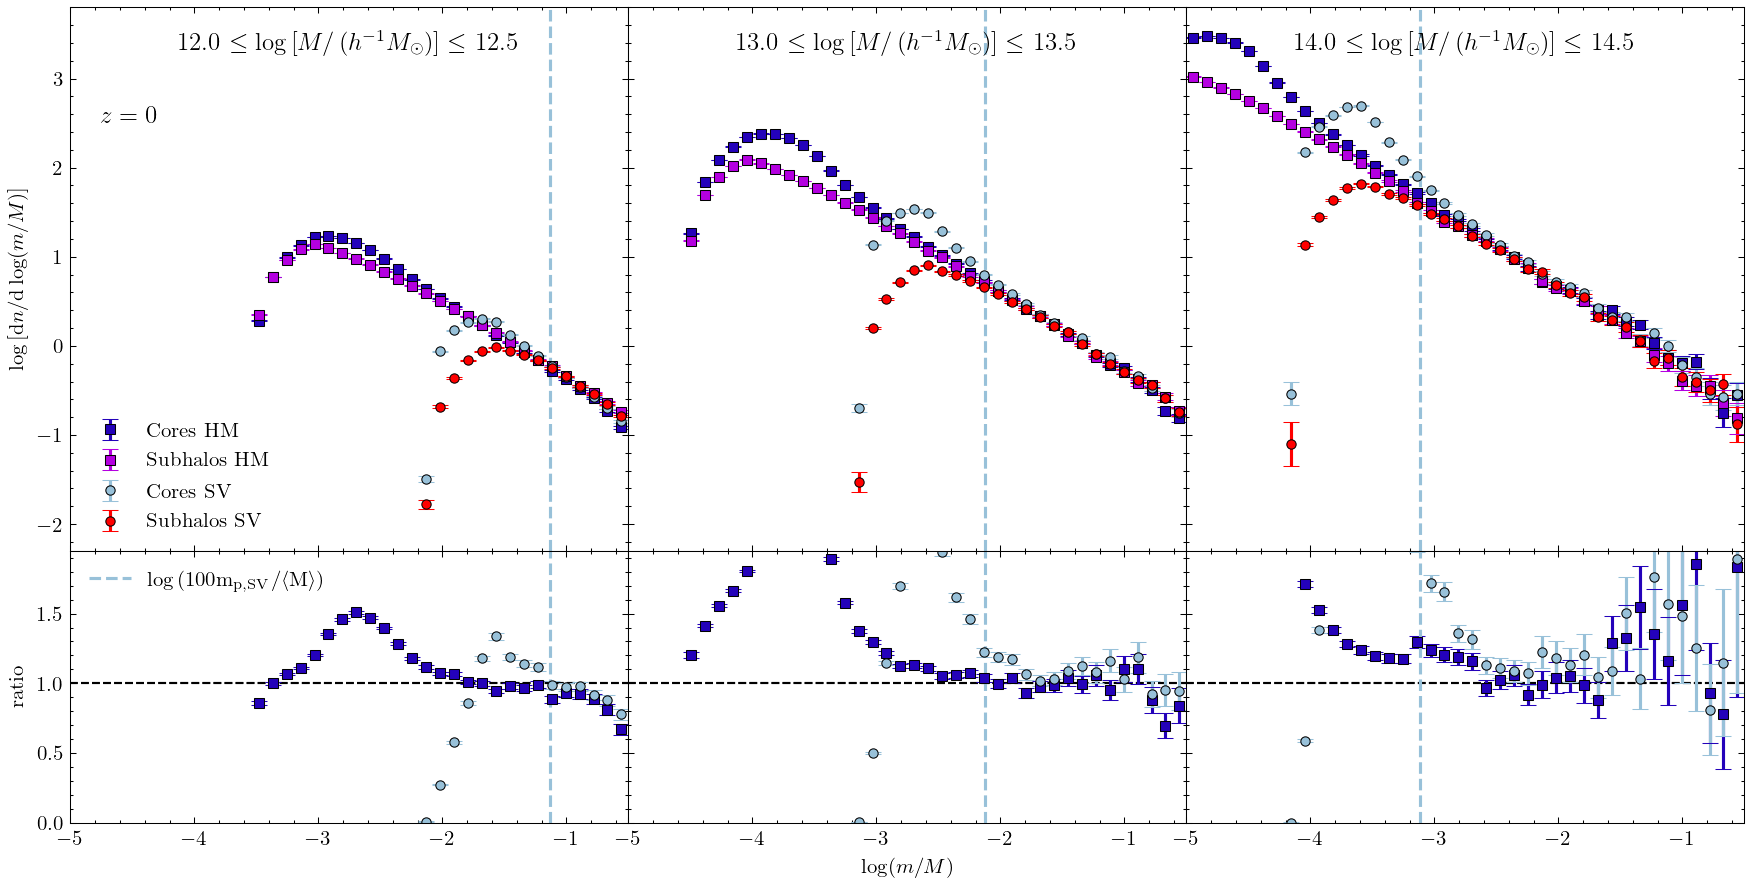

In [10]:
resolution_tests(cc_HM0, sh_HM0, centrals_mask_HM0, cc_SV0, sh_SV0, centrals_mask_SV0, zlabel='$z=0$', smallRatioYaxis=True)

HM nH cores 33020


/home/isultan/projects/itk/itk.py:163: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:179: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


Mavg (cores centrals): 1.6786361e+12
HM nH_sh 33020
HM number of subhalos in bin 560634
Mavg (sh centrals): 1.6786352066843247e+12
5.258196895420167e-05 percent relative difference between Mavg_cores and Mavh_sh

SV nH cores 34592


/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:152: RuntimeWarning: invalid value encountered in subtract
/home/isultan/projects/itk/itk.py:262: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt( (nerr/nfid)**2 + (n*nfiderr/nfid**2)**2 )
/home/isultan/miniconda3/envs/smacc/lib/python3.7/site-packages/ipykernel_launcher.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Mavg (cores centrals): 1.6771427e+12
SV nH_sh 34592
SV number of subhalos in bin 39698
Mavg (sh centrals): 1.6771425055584014e+12
8.909057607314903e-06 percent relative difference between Mavg_cores and Mavh_sh

SV lim: -1.1274658788317269
HM nH cores 2368
Mavg (cores centrals): 1.6394571e+13
HM nH_sh 2368
HM number of subhalos in bin 315103
Mavg (sh centrals): 1.6394565508174967e+13
3.163536240247361e-05 percent relative difference between Mavg_cores and Mavh_sh

SV nH cores 2418
Mavg (cores centrals): 1.6287099e+13
SV nH_sh 2418
SV number of subhalos in bin 21618
Mavg (sh centrals): 1.6287098271249545e+13
4.441788383436948e-06 percent relative difference between Mavg_cores and Mavh_sh

SV lim: -2.1147396297569663
HM nH cores 21
Mavg (cores centrals): 1.6244637e+14
HM nH_sh 21
HM number of subhalos in bin 23437
Mavg (sh centrals): 1.6244634413126762e+14
1.4076807260760282e-05 percent relative difference between Mavg_cores and Mavh_sh

SV nH cores 36
Mavg (cores centrals): 1.4413435e+1

/home/isultan/projects/itk/itk.py:262: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt( (nerr/nfid)**2 + (n*nfiderr/nfid**2)**2 )


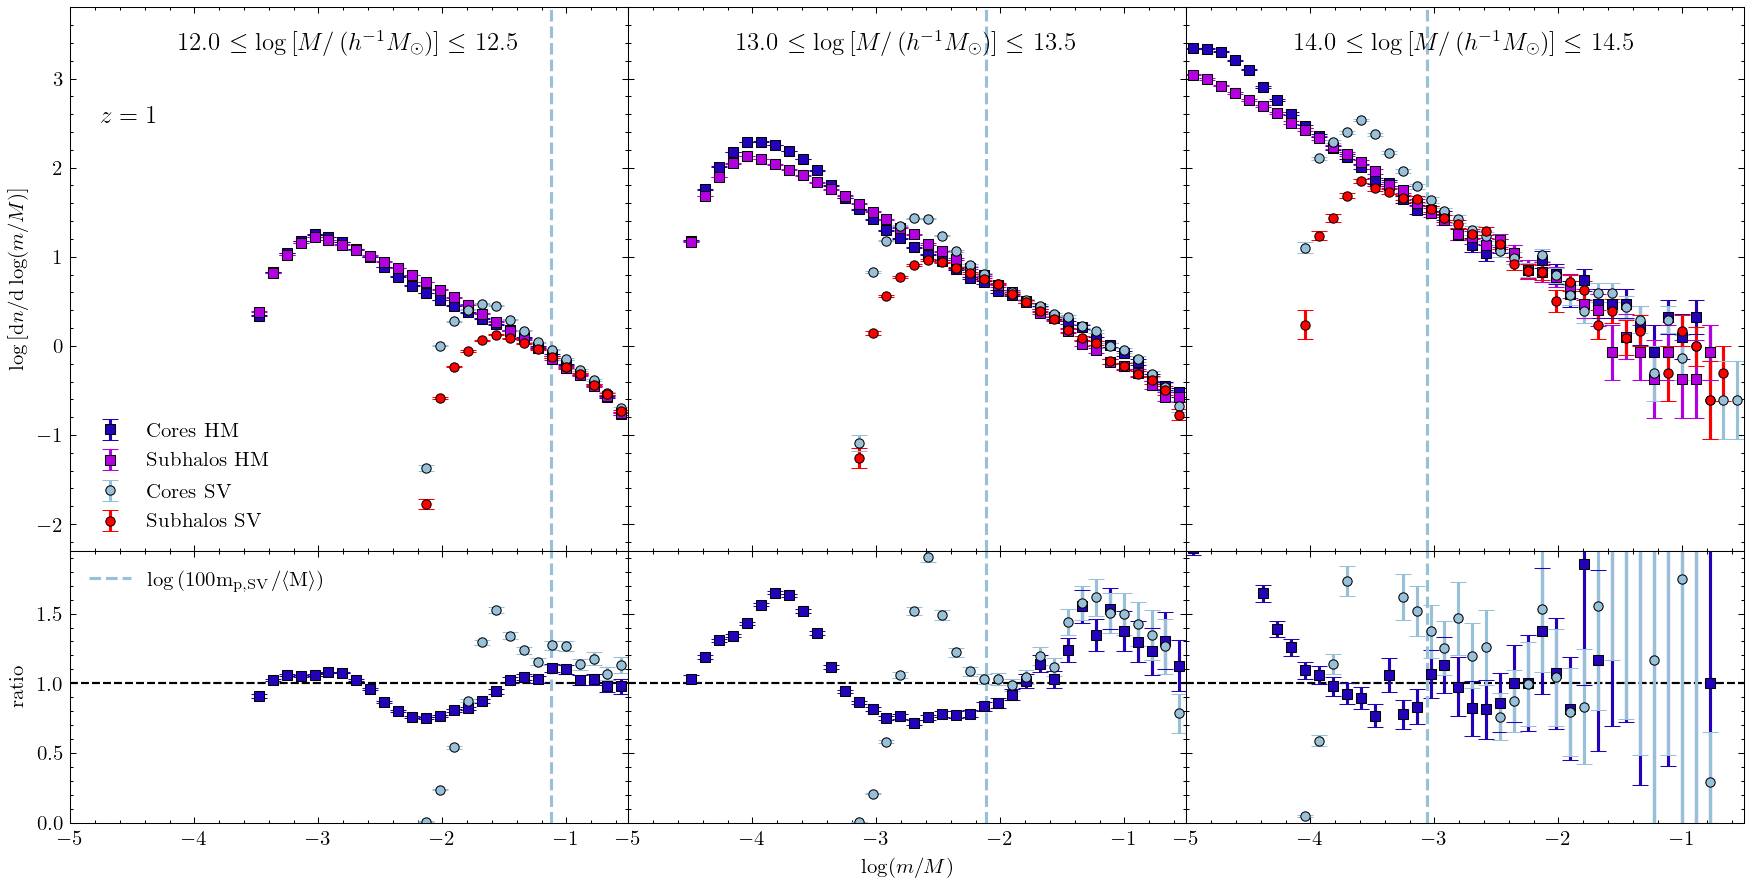

In [11]:
resolution_tests(cc_HM1, sh_HM1, centrals_mask_HM1, cc_SV1, sh_SV1, centrals_mask_SV1, zlabel='$z=1$', smallRatioYaxis=True)